In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\Rajeev kumar\\Desktop\\Bank customer churn prediction\\data\\bank data.csv')
df.sample(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7274,15680901,652,France,Female,34,6,97435.85,2,1,1,104331.76,0
1910,15811261,617,Spain,Male,42,0,70105.87,1,1,1,120830.73,0
1313,15576602,809,France,Male,38,3,0.00,2,1,1,80061.31,0
104,15804919,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
709,15734886,686,France,Female,34,3,123971.51,2,1,0,147794.63,0
5490,15722322,655,Spain,Female,78,2,0.00,2,0,1,188435.38,0
1289,15688880,672,Germany,Male,40,10,102980.44,1,1,0,1285.81,1
1071,15586970,695,Germany,Male,52,8,103023.26,1,1,1,22485.64,0
3430,15780925,625,France,Male,37,1,177069.24,2,1,1,96088.54,0
9252,15800805,451,France,Female,31,7,140931.82,1,0,1,20388.77,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.isnull().mean() * 100

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [7]:
pd.DataFrame({'Data':df.shape[0],
              'No. of null value':df.isnull().sum(),
              'Unique value ':df.nunique()
})

,Data,No. of null value,Unique value
customer_id,10000,0,10000
credit_score,10000,0,460
country,10000,0,3
gender,10000,0,2
age,10000,0,70
tenure,10000,0,11
balance,10000,0,6382
products_number,10000,0,4
credit_card,10000,0,2
active_member,10000,0,2


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Top insights:
- Dataset contains 10,000 customers with no missing numerical values.
- Average credit score is ~650 and average age is ~39 years.
- Customers have an average tenure of 5 years.
- Many customers have zero account balance, indicating inactive or new accounts.
- Most customers use 1–2 products.
- About 70% have a credit card and ~51% are active members.
- Estimated salary is widely distributed with a mean around 100k.
- Churn rate is ~20%, showing moderate class imbalance.

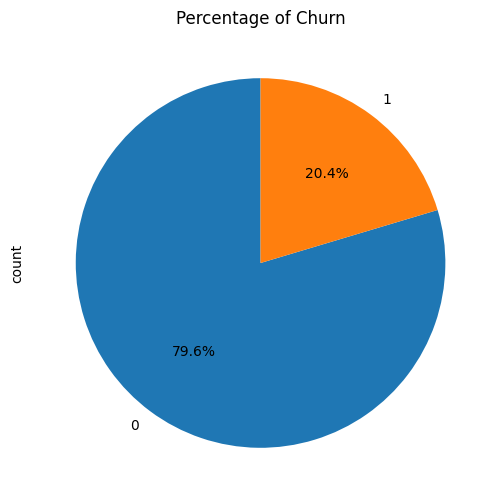

In [33]:
plt.figure(figsize=(6, 6))
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Churn')
plt.show()

In [11]:
df.describe(include="object")


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [12]:
(df['age'] < 10).sum()

np.int64(0)

In [13]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

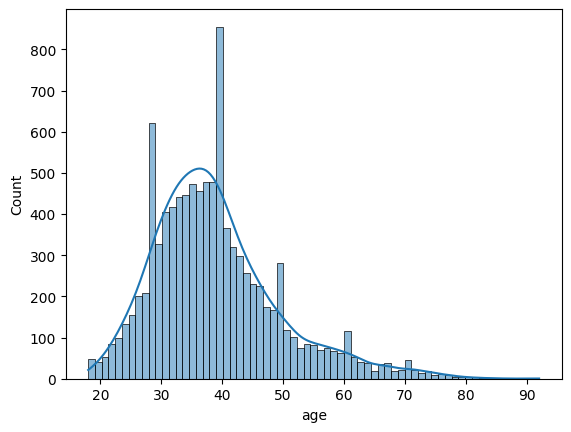

In [14]:
sns.histplot(df['age'], kde=True)

- Customer ages are mostly concentrated between 28 and 45 years.
- The distribution is right-skewed, with fewer customers at higher ages.
- Very few customers are above 70, indicating seniors form a small segment.


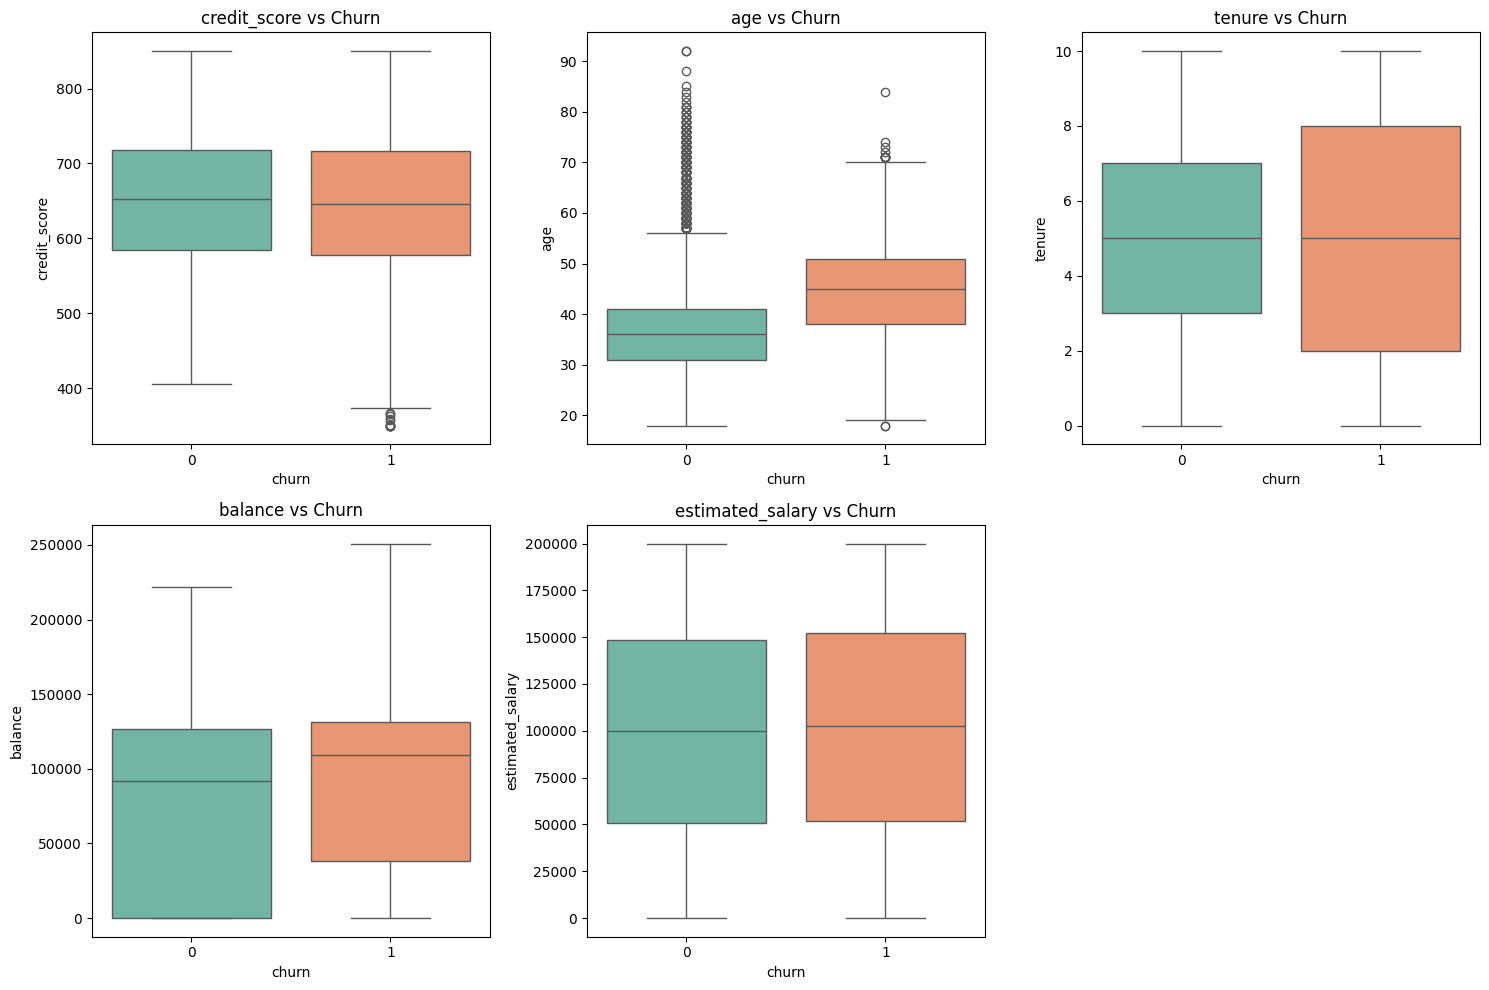

In [15]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=col, data=df, hue='churn', palette='Set2', legend=False)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


Age vs Churn:- age shows a clear separation, making it an important churn factor.
- Customers who left are generally older than non-churn customers.
- Median age of churned customers is higher than non-churned customers.
- Younger customers (around 30–35) are more likely to stay with the bank.

Balance vs Churn:-
- Churned customers tend to have higher account balances.
- Non-churned customers include many with zero or very low balance.
- Customers with more money in the bank are more likely to churn, possibly due to better alternatives or higher expectations.

Credit Score vs churn:
-  Most customers have credit scores between ~600 and 720.
- The median credit score is around 650, indicating an average credit profile.
- A few low-end outliers are present, representing customers with very poor credit scores.

[]

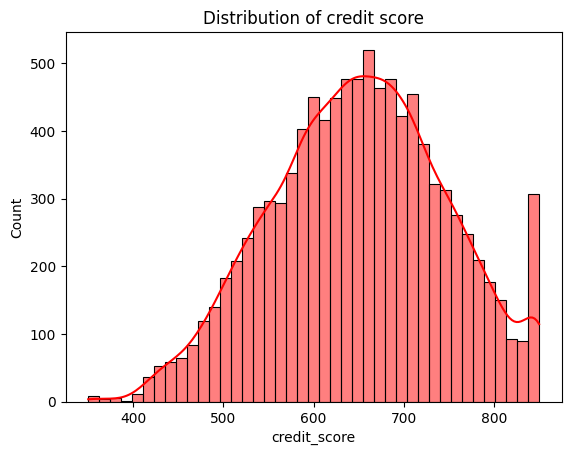

In [16]:
sns.histplot(df['credit_score'], kde=True, color='red')
plt.title('Distribution of credit score')
plt.plot()


- Most customers fall in the 600–750 range, indicating generally good credit health.

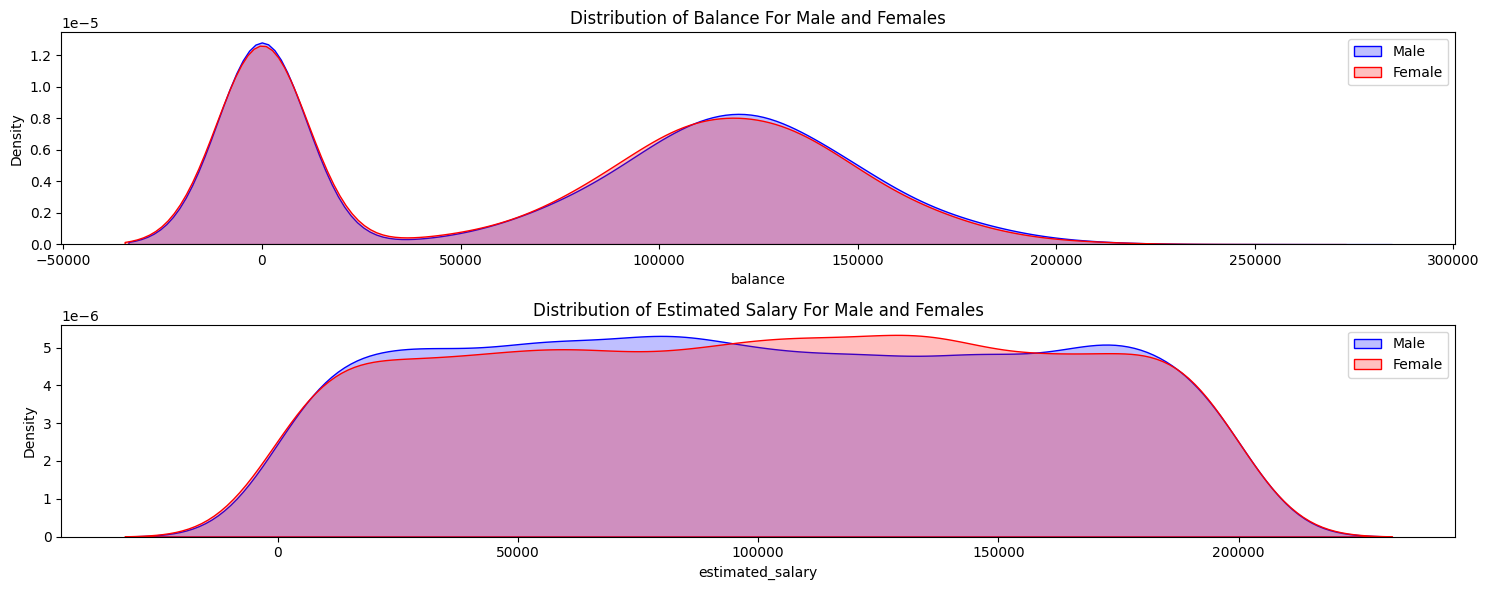

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Balance For Male and Females')

sns.kdeplot(df[(df['gender'] == 'Male')]['balance'],color='blue',fill=True,label='Male')
sns.kdeplot(df[(df['gender'] == 'Female')]['balance'],color='red',fill=True,label='Female')
plt.legend()

plt.subplot(2,1,2)

plt.title('Distribution of Estimated Salary For Male and Females')

sns.kdeplot(df[(df['gender'] == 'Male')]['estimated_salary'],color='blue',fill=True,label='Male')
sns.kdeplot(df[(df['gender'] == 'Female')]['estimated_salary'],color='red',fill=True,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Most Estimated salary in Male is 150k to 200k
- Most estimated salary in female is 100k to 150k

[]

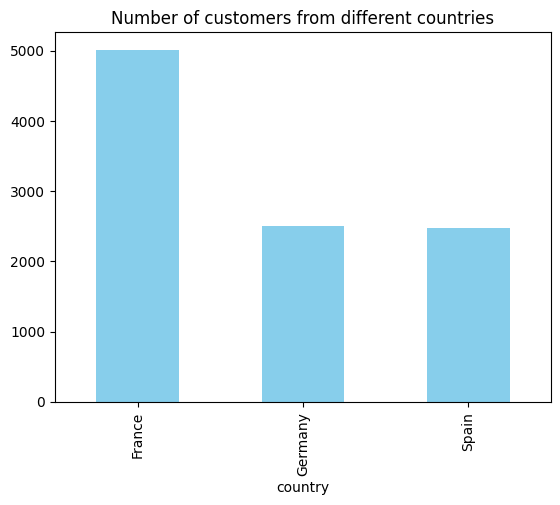

In [18]:
df['country'].value_counts().plot.bar(color='skyblue')
plt.title('Number of customers from different countries')
plt.plot()

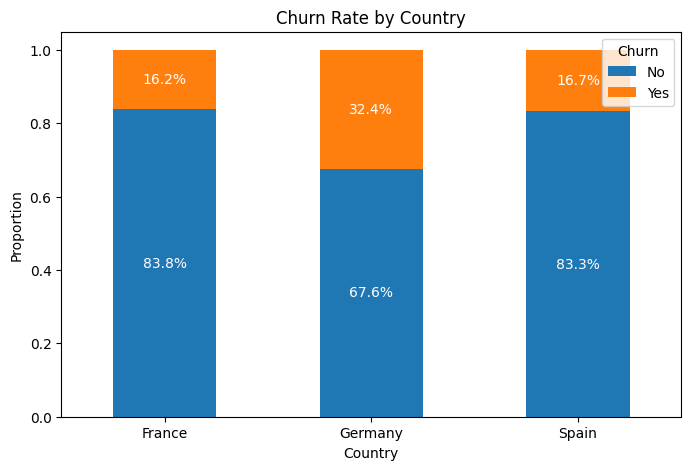

In [19]:
churn = pd.crosstab(df['country'], df['churn'], normalize='index')
ax = churn.plot(kind='bar', stacked=True, figsize=(8,5))

for i, country in enumerate(churn.index):
    cumulative = 0
    for j, col in enumerate(churn.columns):
        value = churn.loc[country, col]
        if value > 0:
            ax.text(
                i, 
                cumulative + value/2,  
                f"{value*100:.1f}%",
                ha='center', 
                va='center', 
                color='white', 
                fontsize=10
            )
        cumulative += value

plt.title("Churn Rate by Country")
plt.xlabel("Country")
plt.ylabel("Proportion")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


- France: Very low churn rate (~16.2%), most customers stay (No).
- Germany: Higher churn rate (~32.4%), indicating a significant portion of customers leave.
- Spain: Similar to France, low churn (~16%).

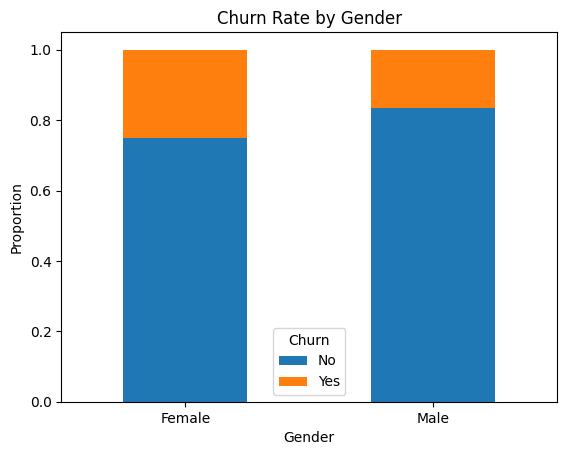

In [20]:
gt = pd.crosstab(df['gender'], df['churn'], normalize='index').plot(kind='bar', stacked=True)

gt.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()

here female customers have higher churn rate

In [21]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
)


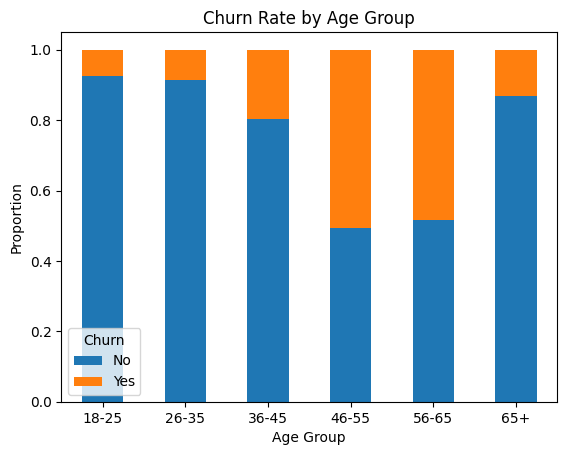

In [22]:
ct = pd.crosstab(df['age_group'], df['churn'], normalize='index')


ct.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


- Churn rate is lowest in younger customers (18–25, 26–35), most stay with the bank.
- Moderate churn is observed in the 36–45 age group.
- Higher churn rates appear in older age groups (46–55, 56–65).
- Customers 65+ have lower churn than 46–65, but still higher than younger groups.

Suggests age influences churn, with middle-aged customers (46–65) being more likely to leave.

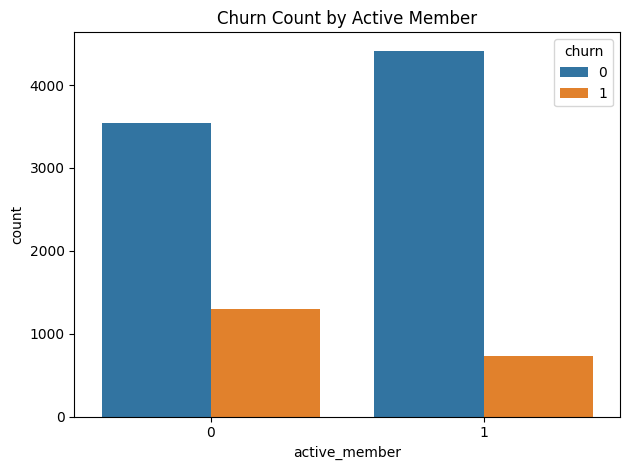

In [23]:
sns.countplot(x='active_member', hue='churn', data=df)
plt.title('Churn Count by Active Member')
plt.tight_layout()
plt.show()


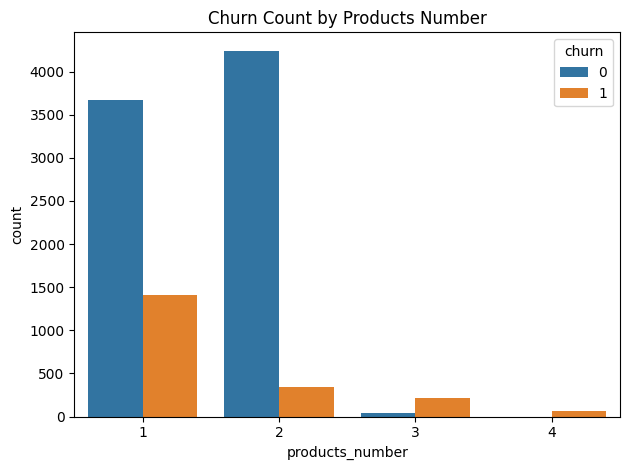

In [24]:
sns.countplot(x='products_number', hue='churn', data=df)
plt.title('Churn Count by Products Number')
plt.tight_layout()
plt.show()

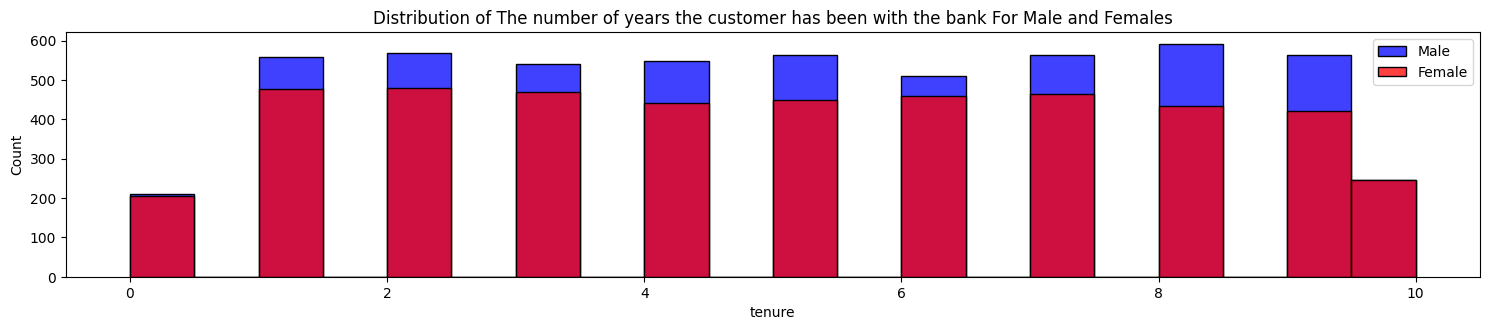

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of The number of years the customer has been with the bank For Male and Females')

sns.histplot(df[(df['gender'] == 'Male')]['tenure'],color='blue',bins=20,label='Male')
sns.histplot(df[(df['gender'] == 'Female')]['tenure'],color='red',bins=20,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Most The number of years the Customer has been with the bank is Males
- The highest customer concentration for both genders lies between 1 to 9 years of tenure.
- Very few customers are present at 0 years and 10 years, indicating extremes are less common.

#### Detecting Outliers:-

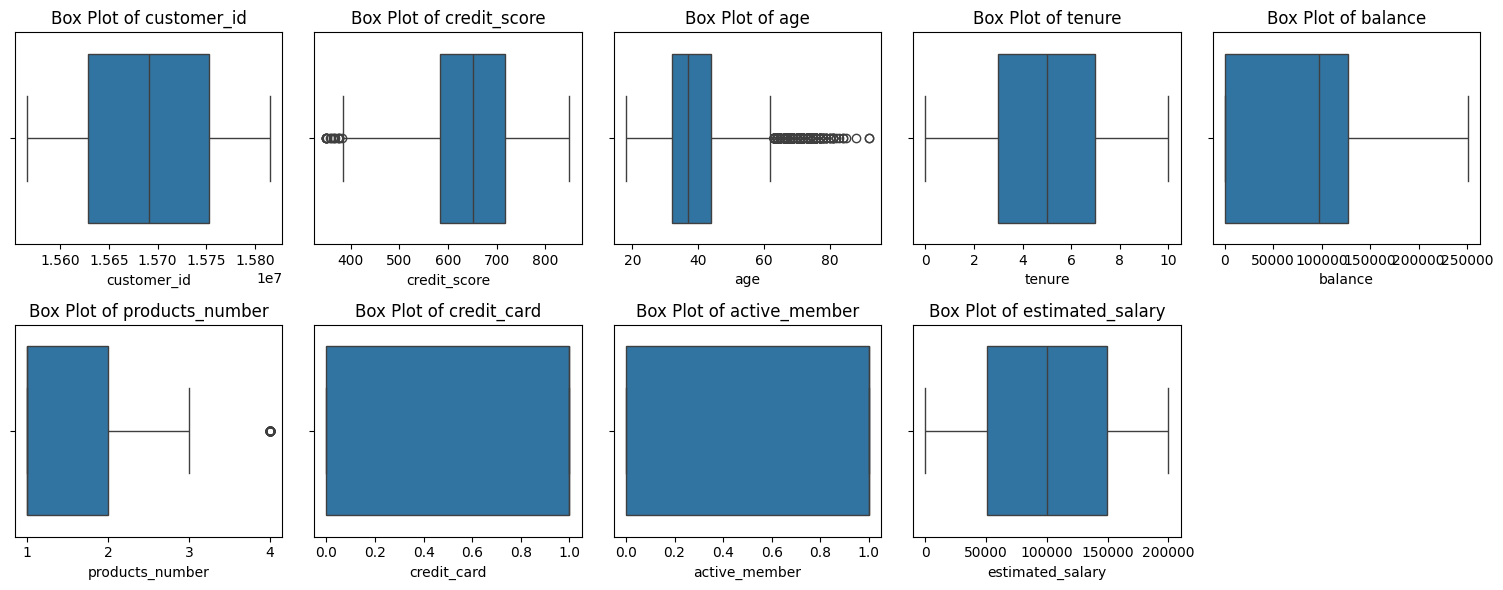

In [26]:
columns_list_numiric = df.select_dtypes('number').columns.to_list()[:-1]
plt.figure(figsize=(15, 6))

for i, col in enumerate(columns_list_numiric, 1):
    plt.subplot(2, 5, i)  
    sns.boxplot(x = df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [27]:

def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

outliers_iqr = detect_outliers_iqr(df, columns_list_numiric)

print(f"No. of outliers in columns:-- Total Data {len(df)}")
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} {len(indices)*100/len(df)}%")

No. of outliers in columns:-- Total Data 10000
customer_id: 0 0.0%
credit_score: 15 0.15%
age: 359 3.59%
tenure: 0 0.0%
balance: 0 0.0%
products_number: 60 0.6%
credit_card: 0 0.0%
active_member: 0 0.0%
estimated_salary: 0 0.0%


In [28]:
df['age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [29]:
df['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Are these Outliers Real?
 - This is not too may ouliers, it's very normal for real world banking data
 - Can a customer be very old -> yes
 - Can someone have very low/high credit score -> yes
 - Can product number = 3 or 4 -> yes

I think they vaid customers, no any data errors.....

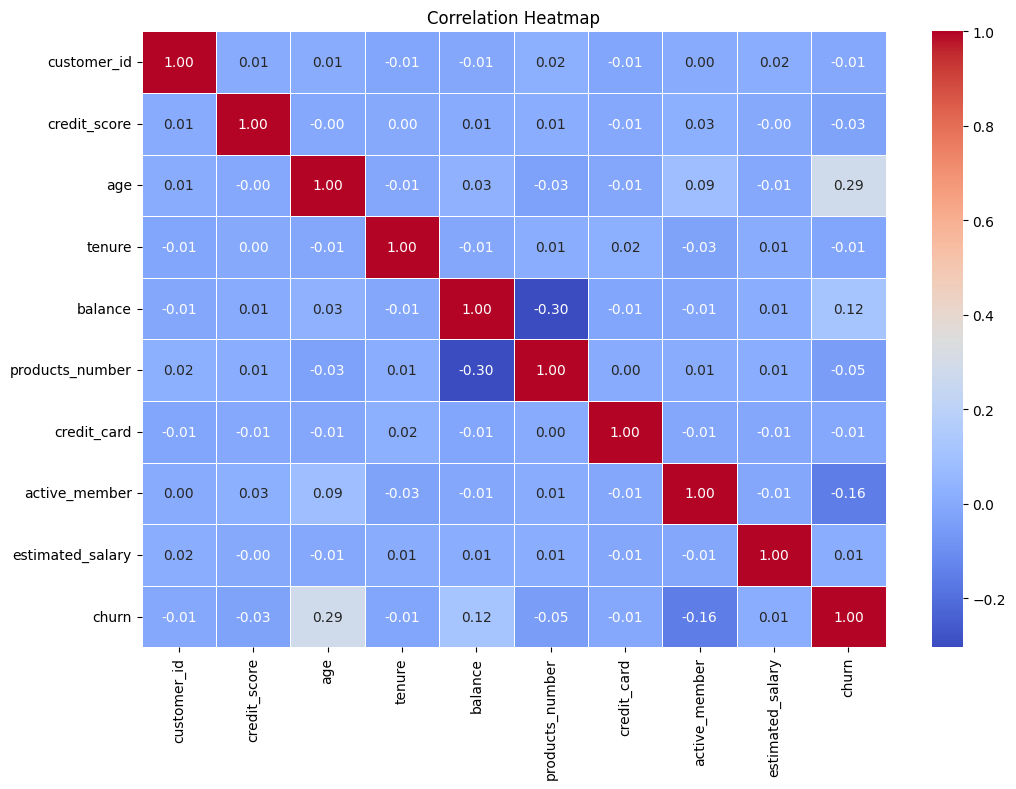

In [30]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,
    annot=True,
    fmt=".2f",       
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

- credit_score (-0.027), products_number (-0.048), credit_card (-0.007), estimated_salary (0.012), tenure (-0.014): These features show minimal direct linear impact on churn.
- balance and products_number have a strong negative correlation (-0.304), suggesting customers with more products tend to have lower balances.
- age and active_member show some positive correlation (0.085), meaning older customers are slightly more likely to be active members.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features for VIF
X_vif = df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']]

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)

            feature        VIF
0      credit_score  19.442916
1               age  12.020539
2            tenure   3.850015
3           balance   2.622428
4   products_number   7.658841
5  estimated_salary   3.882556


In [32]:
df.shape

(10000, 13)

### encoding

### SCaling: